In [1]:
# data source: https://www.kaggle.com/lava18/google-play-store-apps/home
# the aim of this project is to study the reasons behind app success (i.e. high ratings)

In [2]:
# clear all variables, functions, etc
%reset -f

In [3]:
# load libraries
import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
import numpy as np #foundational package for scientific computing
import matplotlib as mpl #collection of functions for scientific and publication-ready visualization
from IPython import display #pretty printing of dataframes in Jupyter notebook
import seaborn as sns #data visualization

print('All libraries loaded successfully')

All libraries loaded successfully


In [4]:
# Configure Visualization Defaults
# %matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')

In [5]:
# Fixing random state for reproducibility
np.random.seed(123)

In [6]:
########## PART 1: DATA PREPROCESSING AND GETTING TO KNOW THE DATA

In [7]:
# import data
full = pd.read_csv('../data/google playstore/googleplaystore.csv')

In [8]:
# view number of rows and number of columns of dataframe
print(full.shape)

(10841, 13)


In [9]:
# view variable types (can use full.dtypes too)
print(full.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None


In [10]:
# view summary statistics of a dataframe (count, mean, sd, min, max, quantiles)
print(full.describe(include='all'))

           App Category       Rating Reviews                Size    Installs  \
count    10841    10841  9367.000000   10841               10841       10841   
unique    9660       34          NaN    6002                 462          22   
top     ROBLOX   FAMILY          NaN       0  Varies with device  1,000,000+   
freq         9     1972          NaN     596                1695        1579   
mean       NaN      NaN     4.193338     NaN                 NaN         NaN   
std        NaN      NaN     0.537431     NaN                 NaN         NaN   
min        NaN      NaN     1.000000     NaN                 NaN         NaN   
25%        NaN      NaN     4.000000     NaN                 NaN         NaN   
50%        NaN      NaN     4.300000     NaN                 NaN         NaN   
75%        NaN      NaN     4.500000     NaN                 NaN         NaN   
max        NaN      NaN    19.000000     NaN                 NaN         NaN   

         Type  Price Content Rating Gen

In [11]:
# view the no. of missing values for each variable in the dataframe 'full'
print(full.isnull().sum())
print('-'*30)

# view the percentage of missing values for each variable
print((full.isnull().sum() / full.shape[0] * 100).sort_values(ascending=False)) # full.shape[0] returns the no. of rows; full.shape[1] returns the no. of cols

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64
------------------------------
Rating            13.596532
Current Ver        0.073794
Android Ver        0.027673
Content Rating     0.009224
Type               0.009224
Last Updated       0.000000
Genres             0.000000
Price              0.000000
Installs           0.000000
Size               0.000000
Reviews            0.000000
Category           0.000000
App                0.000000
dtype: float64


C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


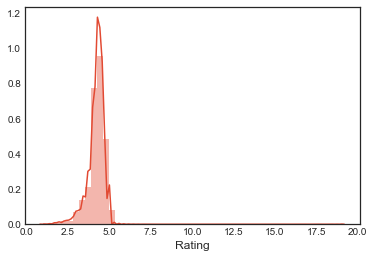

In [12]:
##### simple visualization: look at the distribution of the target variable 'Survived'
sns.distplot(full['Rating'].dropna()) # left-skewed distribution

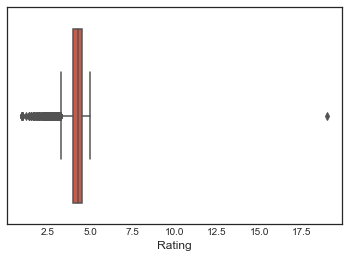

In [13]:
##### step 1: correct obvious data errors, if any

### visually check for outliers via a boxplot
sns.boxplot(x='Rating', data=full) # the outlier is clearly an error

### correct the errors
full.loc[full['Rating']>5, 'Rating'] = np.nan

In [14]:
##### step 2: impute missing values, where reasonable

# impute missing values of Embarked with the mode of Embarked
full['Content Rating'].fillna(full['Content Rating'].mode()[0], inplace = True)

# impute missing values of Fare with the median of Fare
full['Type'].fillna(full['Type'].mode()[0], inplace = True)

In [15]:
##### step 3: feature engineering

# clean and re-bin Installs
full['installs_cleaned'] = full['Installs']
full.loc[full['installs_cleaned']=='Free', 'installs_cleaned'] = full['Installs'].mode()[0]
full['installs_cleaned'] = full['installs_cleaned'].str.replace('+','')
full['installs_cleaned'] = full['installs_cleaned'].str.replace(',','')
full['installs_cleaned'] = full['installs_cleaned'].astype(int)

full['installs_1m'] = 0
full.loc[full['installs_cleaned']>=1000000, 'installs_1m'] = 1

In [16]:
########## PART 2: WHAT VARIABLES ARE CORRELATED WITH RATINGS?

Everyone           8715
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64
--------------------------------------------------


Text(0.5,1,'Relationship between content rating and app rating')

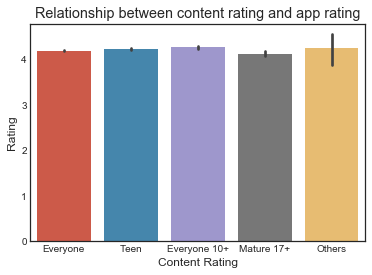

In [17]:
##### content rating

# view value counts
print(full['Content Rating'].value_counts())
print('-'*50)

# combine low-frequency categories of string features (name the combined category as 'Others')
series = pd.value_counts(full['Content Rating'])
mask = (series/series.sum() * 100).lt(1) # categories with <1% frequency will be flagged as True
full['Content Rating'] = np.where(full['Content Rating'].isin(series[mask].index),'Others',full['Content Rating']) # recode categories with <1% frequency to 'Others'
del series, mask

# barplot
sns.barplot(x='Content Rating', y='Rating', data=full).set_title('Relationship between content rating and app rating') # no relationship

               Category    Rating
4             EDUCATION  4.389032
0   BOOKS_AND_REFERENCE  4.346067
16      PERSONALIZATION  4.335987
9                  GAME  4.286326
10   HEALTH_AND_FITNESS  4.277104
19             SHOPPING  4.259664
20               SOCIAL  4.255598
15               Others  4.249634
21               SPORTS  4.223511
18         PRODUCTIVITY  4.211396
6                FAMILY  4.192272
17          PHOTOGRAPHY  4.192114
13              MEDICAL  4.189143
8        FOOD_AND_DRINK  4.166972
2         COMMUNICATION  4.158537
14   NEWS_AND_MAGAZINES  4.132189
7               FINANCE  4.131889
5         ENTERTAINMENT  4.126174
1              BUSINESS  4.121452
23     TRAVEL_AND_LOCAL  4.109292
11            LIFESTYLE  4.094904
24        VIDEO_PLAYERS  4.063750
12  MAPS_AND_NAVIGATION  4.051613
22                TOOLS  4.047411
3                DATING  3.970769
--------------------------------------------------


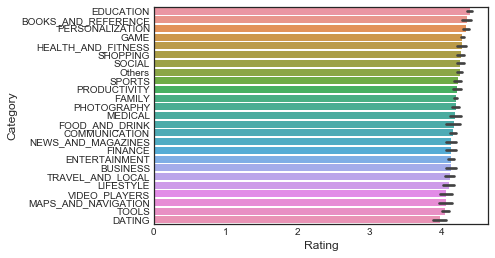

In [18]:
##### category

# combine low-frequency categories of string features (name the combined category as 'Others')
series = pd.value_counts(full['Category'])
mask = (series/series.sum() * 100).lt(1) # categories with <1% frequency will be flagged as True
full['Category'] = np.where(full['Category'].isin(series[mask].index),'Others',full['Category']) # recode categories with <1% frequency to 'Others'
del series, mask

# barplot
result = full.groupby(['Category'])['Rating'].aggregate(np.mean).reset_index().sort_values('Rating', ascending=False)
print(result)
print('-'*50)
sns.barplot(x='Rating', y='Category', data=full, orient='h', order=result['Category']) # education apps do best; dating apps do worst

M    8829
e    1695
k     316
+       1
Name: SizeScale, dtype: int64


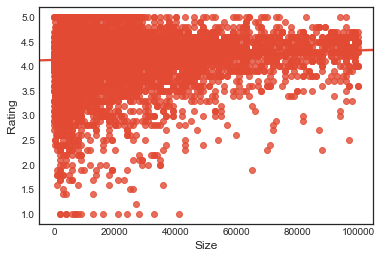

In [19]:
##### Size

# extract the scale of the filesize (e.g. kilobyte, megabyte)
ss = full[['Size','Rating']].copy()
ss['SizeScale'] = ss['Size'].apply(lambda x: x[-1:])

# view value counts
print(ss['SizeScale'].value_counts())

# recode unwanted filesizes
ss[ss['SizeScale']=='+'] = ''
ss[ss['SizeScale']=='e'] = ''

# extract digits from filesize
ss['Size'] = ss['Size'].str.extract('(\d+)', expand=True).astype(float)

# drop obs with missing values
ss = ss.dropna()

# make corrections for megabytes
ss.loc[ss['SizeScale']=='M', 'SizeScale'] = '1000'
ss.loc[ss['SizeScale']=='k', 'SizeScale'] = '1'
ss['SizeScale'] = ss['SizeScale'].astype(int)
ss['Size'] = ss['Size'] * ss['SizeScale']

# scatterplot
sns.regplot(x='Size', y='Rating',  data=ss) # slight positive relationship. the lowest-rated apps tend to be smaller

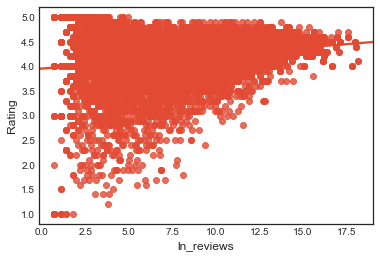

In [20]:
##### Reviews

# correct errors
ss = full[full['Reviews']!='3.0M'].copy() # drop rows with error in Reviews
ss['Reviews'] = ss['Reviews'].astype(int)

# take log
ss['ln_reviews'] = np.log1p(ss['Reviews'])

# scatterplot
sns.regplot(x='ln_reviews', y='Rating',  data=ss) # positive relationship. probably because better apps are installed and used more

Free
0    4.260111
1    4.187666
Name: Rating, dtype: float64
Ttest_indResult(statistic=-3.1703548332855314, pvalue=0.0015274383266825691)


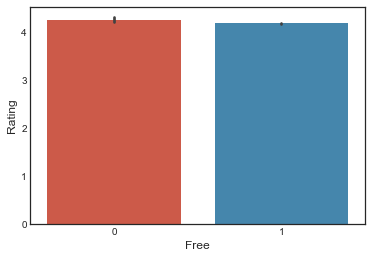

In [21]:
##### Price

# recode 'Everyone' to 0
ss = full.copy()
ss.loc[ss['Price']=='Everyone', 'Price'] = 0

# extract digits from Price
ss['Price'] = ss['Price'].str.extract('(\d+)', expand=True).astype(float)

# create the variable Free
ss['Free'] = 0
ss.loc[ss['Price']==0.0, 'Free'] = 1

# barplot
sns.barplot(x='Free', y='Rating',  data=ss) # free apps are rated slightly lower

# test whether difference is statistically significant via a t-test
ss = ss.dropna()
print(ss.groupby('Free')['Rating'].mean())

import scipy.stats as stats
print(stats.ttest_ind(ss[ss['Free']==1]['Rating'], ss[ss['Free']==0]['Rating'])) # test the null hypothesis that the population mean of Rating for free apps is equal to that of paid apps

In [22]:
# PART 3: DO HIGHER-RATED APPS GET MORE INSTALLS?

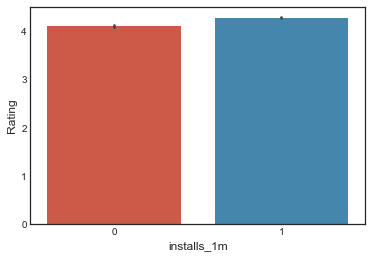

In [23]:
# barplot
ss = full[['Rating', 'installs_1m']].copy()
ss.dropna(inplace=True)
sns.barplot(x='installs_1m', y='Rating', data=ss)

In [24]:
# test whether difference is statistically significant via a t-test
print(ss.groupby('installs_1m')['Rating'].mean())
print(stats.ttest_ind(ss[ss['installs_1m']==1]['Rating'], ss[ss['installs_1m']==0]['Rating']))

installs_1m
0    4.113456
1    4.279791
Name: Rating, dtype: float64
Ttest_indResult(statistic=15.801078858668168, pvalue=1.5899490659335887e-55)
